# Neural Networks 

Humans have always been fascinated by nature and today we are in the era of building intelligent machines, and there is no better inspiration than the brain. Humans are particularly blessed by evolution with a brain capable of performing the most complex tasks.

Neural networks are one of the most powerful algorithms used in the field of machine learning and artificial intelligence nowadays. As the name suggests it draws inspiration from neurons in our brain and the way they are connected. Let us take a quick peek inside our brain.

![Brain](../../img/brain.jpeg)

Neurons are connected inside our brain as depicted in the picture above. This picture shows only 2 neurons connected to each other. In reality, thousands of neurons connect to each neuron. Let us simplify this picture to make an artificial neural network model.

![Cell](../../img/cell_body.jpeg)

![Multiperceptron](../../img/nn_1.jpeg)

### Perceptron

Perceptron is considered the smallest unit of neural networks, it acts as a linear classifier.Let’s look at a very small classification example. Let us try to build a machine which identifies whether an object is a cricket ball or not.

![Cricket](../../img/cricket.jpeg)

Let us arbitrarily choose some properties of this ball.

1. It is Red, we will call this property R of the ball
2. It is spherical, we will call this property S of the ball

![Table](../../img/properties.jpeg)

Depending on the arbitrarily chosen properties, also known as features, we will classify the object as a cricket ball or not. The above table tells us that if a ball is red and spherical, it is a cricket ball, in all other cases, it is not. Let’s see how to do this with a neural network.

To build our super tiny brain which can identify a cricket ball we will take a neuron which just adds up the inputs and outputs the sum.

![NN](../../img/nn_2.jpeg)

Breaking down the above figure; $b, R$ and $S$ are input neurons or simply the inputs to the network, $w0, w1$ and $w2$ are the strengths of connections to the middle neuron which sums up the inputs to it. $b$ here is a constant which is called bias. 

The last step which is the rightmost neuron is just a function called activation function which outputs 1 if the input to it is positive and 0 if the input it negative. Mathematically it looks like:

![form](../../img/formula_1.jpeg)

if this SUM > 0, Output = 1 or Yes and SUM < 0, Output = 0 or No

Let us look at how this helps in classifying our cricket ball. We choose some arbitrary numbers for our connection strengths $w$ and our constant $b$. This is done with a mathematical technique called gradient descent and it is the act of getting this that is called training a neural network. 

For now let’s just assume we got these numbers from somewhere

![form2](../../img/formula_2.jpeg)

Let us fit these values

Case 1: When the object is neither a sphere (S=0) nor red (R=0)

![rugby](../../img/rugby.jpeg)

![form3](../../img/formula_3.jpeg)

he SUM<0 which means the output is 0 or No. Our perceptron says that this is not a cricket ball.

Case 2: When the object is a sphere (S=1) but not red (R=0)

![tennis](../../img/tennis.jpeg)

![form4](../../img/formula_4.jpeg)

The SUM<0 which means the output is 0 or No, not a cricket ball

Case:3 When the object is not a sphere (S=0) but red (R=1)

![strawberry](../../img/strawberry.jpeg)

![form5](../../img/formula_5.jpeg)

The SUM<0 which means the output is 0 or No, not a cricket ball

Case 4: When the object is a sphere (S=1) and red (R=1)

![cricket2](../../img/cricket_2.jpeg)

![form6](../../img/formula6.jpeg)

The SUM>0 which means the output is 1. Et Voila! Our perceptron says it is a cricket ball.

This is the most rudimentary idea behind a neural network even though oversimplified. We connect lot of these perceptrons in a particular manner and what we get is a neural network. 

### How is this is actually implemented?

![graph](../../img/comp_graph.PNG)

### Forward pass + Gradient descent of Backward pass (Back Propagation)

![back1](../../img/backprop1.PNG)

![back2](../../img/backprop2.PNG)

![back6](../../img/backprop6.PNG)

![back3](../../img/backprop3.PNG)

![back4](../../img/backprop4.PNG)

![back5](../../img/backprop5.PNG)

![back6](../../img/backprop7.PNG)

### Code Dictionary
code | description
-----|------------
`sklearn.neural_network.MLPClassifier` | neural network multi-layer perceptron classifier of scikit-learn.
`sklearn.neural_network.MLPRegressor` |  neural network multi-layer perceptron regression model of scikit-learn.
`classification_report` | provides precsion, recall and f1scores of a classification model.
`.value_counts()` | provides counts of unique values for a feature.
`.pairplot()` | Plot pairwise relationships of numerical features in a dataset.

In [1]:
import pandas as pd
import numpy as np

# Location of dataset
url = 'http://bit.ly/PGGM_dataset'

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url)

To see what this dataset actually looks like, execute the following command:

### Data Exploration
We always want to visualize and understand our data first!

In [2]:
print("Samples: {}, Features: {}".format(*irisdata.shape))
irisdata['Universe_Returns_F4W_cat'] = np.where(irisdata['Universe_Returns_F4W']>0, 1, -1)
irisdata.head()

Samples: 38304, Features: 18


,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,Universe_Returns_F4W_cat
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765,-1
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881,1
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938,-1
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364,1
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392,1


Wow! 38k samples. Good since we want over 10K samples! Also we have about 18 features so it seems like the curse of dimensionality may be an issue. Next, lets make a pairplot to see that there are a couple of features which will give a large indication of how to classify our samples.

In [3]:
import seaborn as sns
g = sns.pairplot(irisdata, hue="cat_sales_growth")
g

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


![pairplot](../../img/pairplot.png)

In [4]:
# Remove missing data
irisdata = irisdata.dropna()

# Assign data from fifth column to 8th variable Universe_Returns_F1W to Weight
X = irisdata.iloc[:, [7,11]]

# Assign data from our new categorical columns to y variable
y = irisdata.iloc[:, 18] 

In [5]:
y.head()  

0   -1
1    1
2   -1
3    1
4    1
Name: Universe_Returns_F4W_cat, dtype: int32

first let's see how many unique values we have in our y series.

In [21]:
y.value_counts()

 1    19837
-1    18189
Name: Universe_Returns_F4W_cat, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) 

In [40]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

### Training and Predictions
And now it's finally time to do what you have been waiting for, train a neural network that can actually make predictions. 

In [41]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(
    hidden_layer_sizes=(50,3),
    activation='logistic',
    solver='sgd',
    batch_size=32,
    learning_rate='adaptive',
    learning_rate_init=0.3,
    early_stopping=True,
    validation_fraction=0.2,
    verbose=10,
    random_state=42,
    max_iter=100
)
# from plot_learning_curve import plot_learning_curve
clf.fit(X_train, y_train)  

Iteration 1, loss = 0.59359431
Validation score: 0.693951
Iteration 2, loss = 0.58197616
Validation score: 0.678994
Iteration 3, loss = 0.58004912
Validation score: 0.701348
Iteration 4, loss = 0.57996963
Validation score: 0.692965
Iteration 5, loss = 0.57922991
Validation score: 0.680966
Iteration 6, loss = 0.58062206
Validation score: 0.686226
Iteration 7, loss = 0.57944553
Validation score: 0.701019
Iteration 8, loss = 0.57885744
Validation score: 0.700197
Iteration 9, loss = 0.57877172
Validation score: 0.693787
Iteration 10, loss = 0.57884815
Validation score: 0.684911
Iteration 11, loss = 0.57855068
Validation score: 0.699540
Iteration 12, loss = 0.57970396
Validation score: 0.702170
Iteration 13, loss = 0.58002492
Validation score: 0.702334
Iteration 14, loss = 0.57928519
Validation score: 0.659599
Iteration 15, loss = 0.57864351
Validation score: 0.692801
Iteration 16, loss = 0.57872108
Validation score: 0.702991
Iteration 17, loss = 0.57879236
Validation score: 0.700197
Iterat

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 3), learning_rate='adaptive',
       learning_rate_init=0.3, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.2, verbose=10, warm_start=False)

Yes, with Scikit-Learn, you can create neural network with these three lines of code, which all handles much of the leg work for you. Let's see what is happening in the above script. The first step is to import the MLPClassifier class from the sklearn.neural_network library. In the second line, this class is initialized with two parameters.

The parameter, hidden_layer_sizes, is used to set the size of the hidden layers. In our script we will create three layers of 50 nodes each. There is no standard formula for choosing the number of layers and nodes for a neural network and it varies quite a bit depending on the problem at hand. The best way is to try different combinations and see what works best.


In [42]:
predictions = clf.predict(X_test)  

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print("Test set score: %.3f" % clf.score(X_test, y_test))

              precision    recall  f1-score   support

          -1       0.69      0.73      0.71      3749
           1       0.73      0.69      0.71      3857

   micro avg       0.71      0.71      0.71      7606
   macro avg       0.71      0.71      0.71      7606
weighted avg       0.71      0.71      0.71      7606

Test set score: 0.710


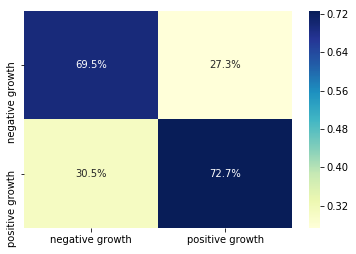

In [44]:
import seaborn as sns
cm = confusion_matrix(y_test,predictions)
labels = ['negative growth', 'positive growth']
sns.heatmap(cm / sum(cm), cmap="YlGnBu", annot=True, fmt=".1%", xticklabels=labels, yticklabels=labels)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


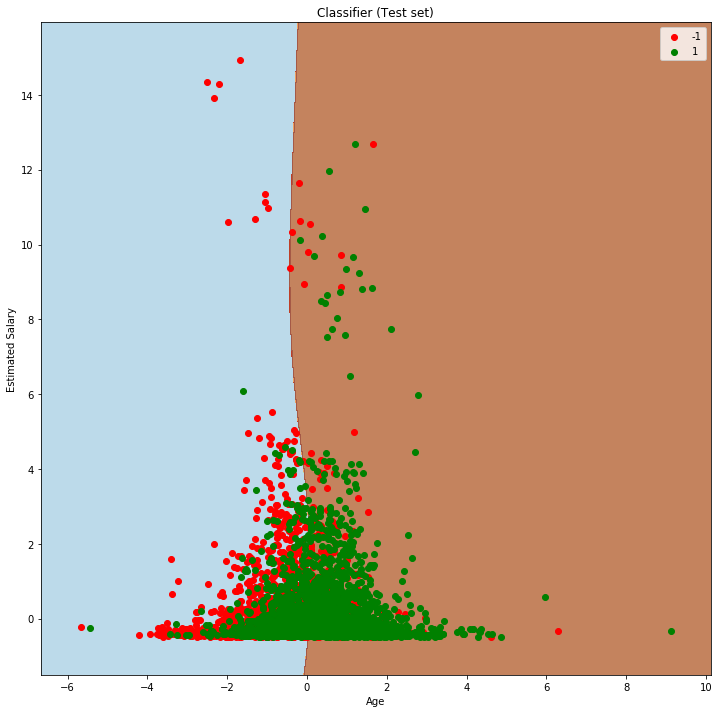

In [68]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(12,12))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = plt.cm.Paired)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

A confusion matrix can be useful to seeing where our model is struggling. We want 100%s on the diagonal. In this case, it looks like our model can only predict positive growth. This can be due to the class imbalance of sales growth and we may want to do better feature engineering.

<img src='../../img/download.png'>

<img src='../../img/download1.png'>

<img src='../../img/download2.png'>

## Exercise

In [69]:
# Make an equivalent NN model for regression on the Universe_Returns_F4W values using 
# scikit-learn's MLPRegressor in a similar way as the example in the NN notebook

In [ ]:
# Try your own brand of model selection using cross validation and grid search to get the best model

I highly recommend you check out http://cs231n.github.io/neural-networks-case-study/ for a simple NN implementation

my email: seun.adekunle@maastrichtuniversity.nl